# 数値計算  
- **Submission date**: 2017/11/24
- **Team**: へび  
- **Members**:  
    + #5501 Kazunori Sakai  
    + #5531 Akihiro Nitta  
    + #5557 Yuki Kotakehara  

In [1]:
import numpy as np
import scipy
from scipy import integrate, interpolate
import matplotlib.pyplot as plt
from sympy import *

## 6.7 課題 [p.61]  
**2**. 次の4点を通る多項式を以下のそれぞれの手法で求めよ．  
- (a) 逆行列  
- (b) ラグランジュ補間  
- (c) ニュートンの差分商公式  

|x|y|  
|:-:|:-:|  
|0|1|  
|1|2|  
|2|3|  
|3|-2|  

**6**. 関数$f(x) = \frac{1}{1+x^2}$を $x = 0..1$ で等間隔に $N+1$ 点をとり，$N$ 個の区間に分けて数値積分で求める．$N$ を $2, 4, 8, 16, 32, 64, 128, 256$ と取ったときの 以下のそれぞれの手法の収束性を比較せよ．  
- (a) 中点法  
- (b) 台形公式  
- (c) シンプソン公式  

    ヒント：Maple script にあるそれぞれの数値積分方を関数 (procedure) に直して，for-loop で回せば楽．できなければ，一つ一つ手で変えてもOK．両対数プロットすると見やすい．  

4
[[ 1  0  0  0]
 [ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]]
[[ 1.          0.          0.          0.        ]
 [-1.83333333  3.         -1.5         0.33333333]
 [ 1.         -2.5         2.         -0.5       ]
 [-0.16666667  0.5        -0.5         0.16666667]]
[ 1. -1.  3. -1.]
多項式補間の結果

-1.0x^3+3.0x^2+-1.0x^1+1.0x^0+

    3     2
-1 x + 3 x - 1 x + 1


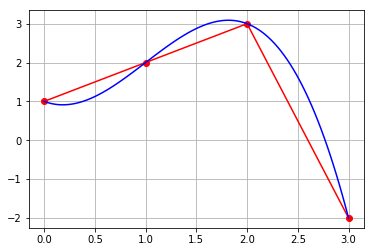

ニュートン補間係数は...
b0 = 1.0
b1 = 1.0
b2 = 0.0
b3 = -1.0
よってニュートン補間多項式は...
f(x) = 1.0 + (x - 0.0) * (1.0 + (x - 1.0) * (0.0 + (x - 2.0) * (-1.0 )))
     = -1.0*x**3 + 3.0*x**2 - 1.0*x + 1.0
それぞれの関数値は...
f(0.0) = 1.00000000000000
f(1.0) = 2.00000000000000
f(2.0) = 3.00000000000000
f(4.0) = -19.0000000000000

ニュートン補間係数の演算総数:除算は6回
ニュートン補間係数の演算総数:減算は12回
ニュートン補間多項式の演算総数:乗算は3回
ニュートン補間多項式の演算総数:加算は6回


In [9]:
# 2
xk = np.array([0, 1, 2, 3])
fk = np.array([1, 2, 3, -2])
plt.plot(xk, fk, 'o', color='r') # data plot
plt.plot(xk, fk, color='r') # draw line

## (a) 逆行列
A = np.array([xk[0]**0,xk[0]**1,xk[0]**2,xk[0]**3,
               xk[1]**0,xk[1]**1,xk[1]**2,xk[1]**3,
               xk[2]**0,xk[2]**1,xk[2]**2,xk[2]**3,
               xk[3]**0,xk[3]**1,xk[3]**2,xk[3]**3]).reshape((4,4))

inv_A = np.linalg.inv(A)

z=np.dot(inv_A,fk)

size=str(len(z))
print (size)
        
print(A)
print(inv_A)
print(z)
print('多項式補間の結果\n')
for i in reversed(range(0,4)):
    print(z[i], end='')
    print('x^{0}+'.format(i), end='')
print('\n')

## (b) Lagrange interpolate
f = scipy.interpolate.lagrange(xk, fk)
print(f)
xk = np.linspace(0, 3, 100)
fk = f(xk)
plt.plot(xk, fk, color='b')
plt.grid()
plt.show()

## (c) ニュートンの差分商公式
x = symbols("x")
y = symbols("y")

bk_div_times = 0 #除算回数
bk_sub_times = 0 #減算回数
yk_mul_times = 0 #乗算回数
yk_add_times = 0 #加算回数

# 初期化
xk = [0.0, 1.0, 2.0, 3.0]
fk = [1.0, 2.0, 3.0, -2.0]
number_of_points = len(xk)
n = number_of_points - 1
bk = [fk[0]] #0次のニュートン補間係数b0はf0なのでアペンドする
differences = fk
term = []

# 係数を求めるときに必要な差分を求めるメソッド
def take_a_difference(denomi1, denomi2, numer1, numer2):
    global bk_div_times
    global bk_sub_times
    bk_div_times += 1
    bk_sub_times += 2
    return (denomi1 - denomi2) / (numer1 - numer2)

# ニュートン補間係数を計算するメソッド
def calculate_coefficient(diff, h):
    diff_len = len(diff)
    differences_temp = []
    offset = number_of_points+1 - diff_len
    if diff_len < 1:
        return 0
    for i in range(0, diff_len-1):
        d = take_a_difference(diff[i+1], diff[i], xk[i+1+h], xk[i+1+h-offset])
        differences_temp.append(d)
        if i == 0:
            bk.append(d)
    diff = differences_temp
    calculate_coefficient(diff,h+1)

# m次までの補間多項式の項を求めるメソッド
def calculate_term(m):
    if m > n:
        return 0
    else:
        term.append("{0} + (x - {1})".format(bk[m],xk[m]))
        calculate_term(m+1)

# 項から補間多項式を求めるメソッド
def calculate_polynomial():
    global yk_mul_times
    global yk_add_times
    for i in range(1, len(term)):
        yk_mul_times += 1
        yk_add_times += 2
        term[0] = term[0] + " * (" + term[i]
    polynomial = term[0]
    for j in range(0, n):
        polynomial = polynomial + ")"
    eliminate = "+ (x - {0})".format(xk[-1])
    return polynomial.replace(eliminate,"")

if __name__ == "__main__":
    # ニュートン補間係数bkを求める
    calculate_coefficient(differences, 0)
    print("ニュートン補間係数は...")
    for i in range(0,len(bk)):
        print("b{0} = {1}".format(i, bk[i]))

    # ニュートン補間多項式を求める
    calculate_term(0)
    y_str = calculate_polynomial()
    y = sympify(y_str)
    print("よってニュートン補間多項式は...")
    print("f(x) = {0}".format(y_str))
    print("     = {0}".format(expand(y)))
    print("それぞれの関数値は...")
    print("f({0}) = {1}".format(xk[0], y.subs([(x,xk[0])])))
    print("f({0}) = {1}".format(xk[1], y.subs([(x,xk[1])])))
    print("f({0}) = {1}".format(xk[2], y.subs([(x,xk[2])])))
    print("f({0}) = {1}".format(4.0, y.subs([(x,4.0)])))

    print("")
    print("ニュートン補間係数の演算総数:除算は{0}回".format(bk_div_times))
    print("ニュートン補間係数の演算総数:減算は{0}回".format(bk_sub_times))
    print("ニュートン補間多項式の演算総数:乗算は{0}回".format(yk_mul_times))
    print("ニュートン補間多項式の演算総数:加算は{0}回".format(yk_add_times))

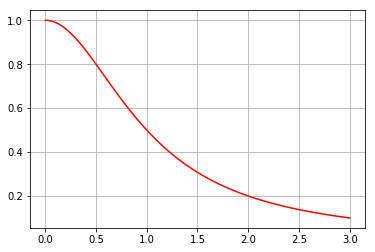

scipy.integrate: (0.7853981633974484, 8.719671245021581e-15)
midpoint: 0.7857236823979222
1
2
3
4
5
6
7
trapezoidal: 0.7847471236227722
1
3
5
7
2
4
6
Simpson's0.7853981256146767


In [8]:
# 6
def func(x):
    return 1.0/(1.0+x**2)

x = np.linspace(0,3, 100)
y = func(x)

plt.plot(x, y, color = 'r')

plt.grid()
plt.show()
print('scipy.integrate: ', end='')
print(scipy.integrate.quad(func, 0, 1))


## (a) midpoint rule
N, x0, xn = 8, 0.0, 1.0

h = (xn-x0)/N
S = 0.0
for i in range(0, N):
    xi = x0 + (i+0.5)*h
    dS = h * func(xi)
    S = S + dS

print('midpoint: ', end='')
print(S)


## (b) trapezoidal rule
N, x0, xn = 8, 0.0, 1.0

h = (xn-x0)/N
S = func(x0)/2.0
for i in range(1, N):
    xi = x0 + i*h
    dS = func(xi)
    S = S + dS
    print("{0}".format(i))

S = S + func(xn)/2.0
print('trapezoidal: ', end='')
print(h*S)


## (c) Simpson's rule
N, x0, xn = 8, 0.0, 1.0

M = int(N/2)
h = (xn-x0)/N
Seven, Sodd = 0.0, 0.0
for i in range(1, 2*M, 2): #rangeの終わりに注意
    xi = x0 + i*h
    Sodd += func(xi)
    print("{0}".format(i))
for i in range(2, 2*M, 2):
    xi = x0 + i*h
    Seven += func(xi)
    print("{0}".format(i))

print('Simpson\'s', end='')
print(h*(func(x0)+4*Sodd+2*Seven+func(xn))/3)